## **Pricipal Component Analysis (PCA)**

In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [31]:
data = fetch_california_housing()

In [32]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedVal'] = data.target

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   MedVal      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [34]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


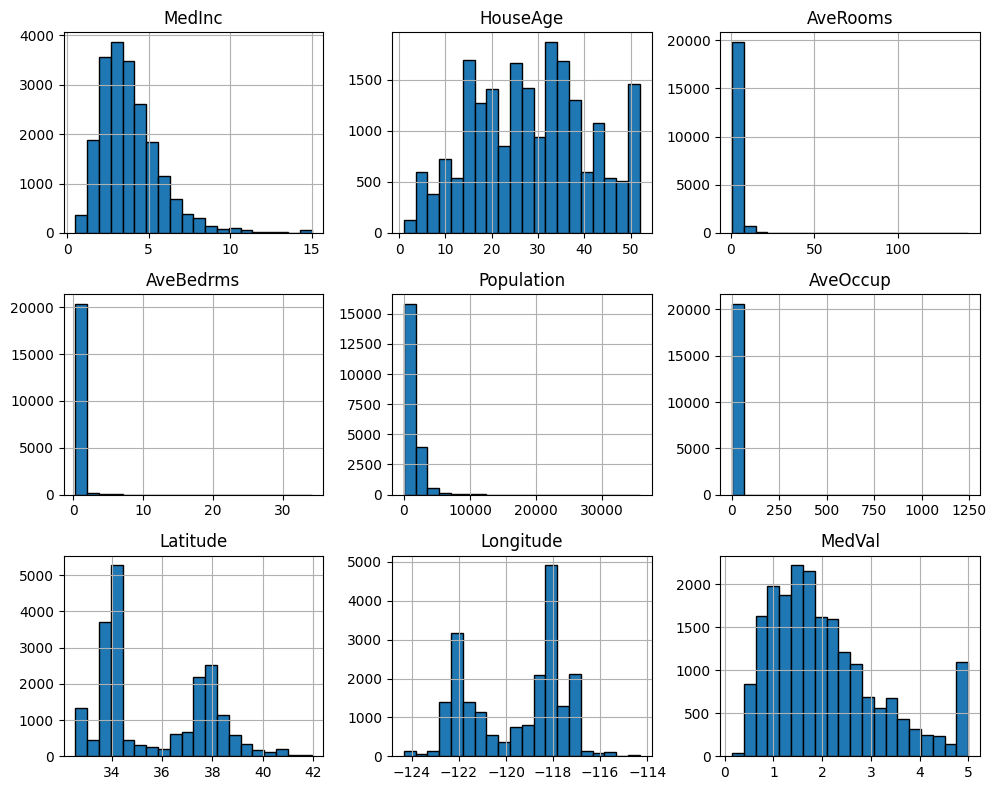

In [35]:
import matplotlib.pyplot as plt
df.hist(figsize=(10,8), bins=20, edgecolor='k')
plt.tight_layout()
plt.show()

In [37]:
x = df.drop('MedVal', axis=1)
y = df['MedVal']

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
scalar_data = scaler.fit_transform(x)

In [40]:
scalar_data

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [42]:
pca_data = pca.fit_transform(scalar_data)
pca_data

array([[ 1.88270434, -0.50336186],
       [ 1.37111955, -0.12140565],
       [ 2.08686762, -0.5011357 ],
       ...,
       [ 1.40235696, -1.09642559],
       [ 1.5429429 , -1.05940835],
       [ 1.40551621, -0.89672727]])

In [43]:
pca.explained_variance_

array([2.02704763, 1.88139074])

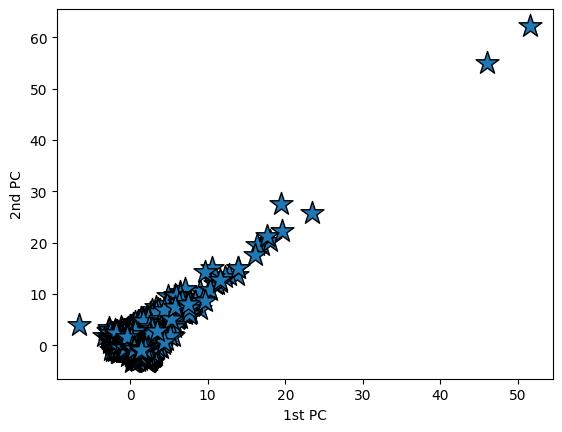

In [44]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], marker='*', edgecolors='k', s=300)
plt.xlabel('1st PC')
plt.ylabel('2nd PC')
plt.show()